In [1]:
import pandas as pd
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.datasets import fetch_california_housing

from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats

In [2]:
# Load the California Housing dataset
housing = fetch_california_housing(as_frame=True)


df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df["target"] = housing.target

df = df[(np.abs(stats.zscore(df)) < 5).all(axis=1)]
df = df.reset_index(drop=True)
X = df[housing.feature_names]
targets = df["target"]
# Always use transform_data function on X
scaler = StandardScaler().fit(np.array(targets).reshape(-1, 1))
targets = scaler.transform(np.array(targets).reshape(-1, 1)).flatten()

df["target"] = targets
data=df

In [4]:
import sys
sys.path.append('..')
from xDL.models.NAM import NAM

In [8]:

nam = NAM(
    "target ~  -1 +  CubicSplineNet(Latitude, encoding=int, n_bins=25) + CubicSplineNet(Longitude, encoding=int, n_bins=25) + MLP(MedInc) + MLP(AveRooms) + MLP(AveOccup) + MLP(AveBedrms)+ MLP(Population)", 
    data=data, 
    feature_dropout=0.0001
    )

In [9]:
nam.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error", metrics="mse")

# Train the model
nam.fit(nam.training_dataset, epochs=150, validation_data=nam.validation_dataset)

# Evaluate the model
loss = nam.evaluate(nam.validation_dataset)
print("Test Loss:", loss)

Epoch 1/150


16/16 [==============================] - 3s 47ms/step - loss: 40.5349 - mse: 40.5349 - val_loss: 1.3237 - val_mse: 1.3237
Epoch 2/150
16/16 [==============================] - 0s 22ms/step - loss: 20.6110 - mse: 20.6110 - val_loss: 0.4888 - val_mse: 0.4888
Epoch 3/150
16/16 [==============================] - 0s 22ms/step - loss: 13.0442 - mse: 13.0442 - val_loss: 0.4738 - val_mse: 0.4738
Epoch 4/150
16/16 [==============================] - 0s 21ms/step - loss: 9.6758 - mse: 9.6758 - val_loss: 0.4252 - val_mse: 0.4252
Epoch 5/150
16/16 [==============================] - 0s 21ms/step - loss: 7.4473 - mse: 7.4473 - val_loss: 0.4185 - val_mse: 0.4185
Epoch 6/150
16/16 [==============================] - 0s 22ms/step - loss: 6.2596 - mse: 6.2596 - val_loss: 0.4166 - val_mse: 0.4166
Epoch 7/150
16/16 [==============================] - 0s 22ms/step - loss: 5.2421 - mse: 5.2421 - val_loss: 0.4029 - val_mse: 0.4029
Epoch 8/150
16/16 [==============================] - 0s 22ms/step - loss: 4.5419 -

16/16 [==============================] - 0s 7ms/step


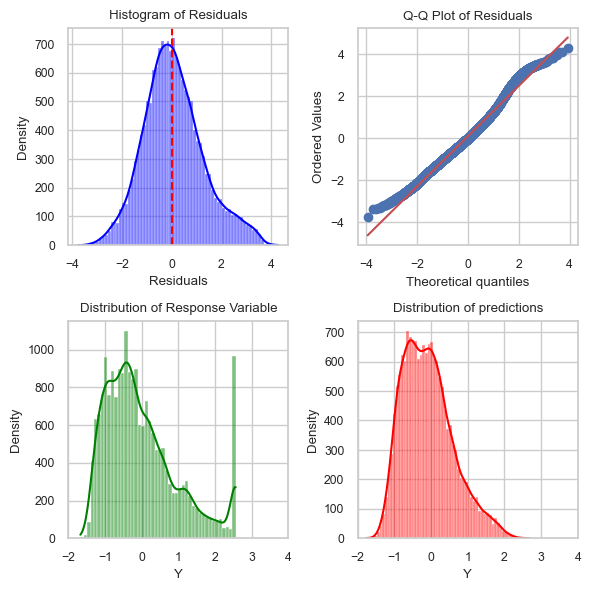

In [10]:
nam.analytics_plot()

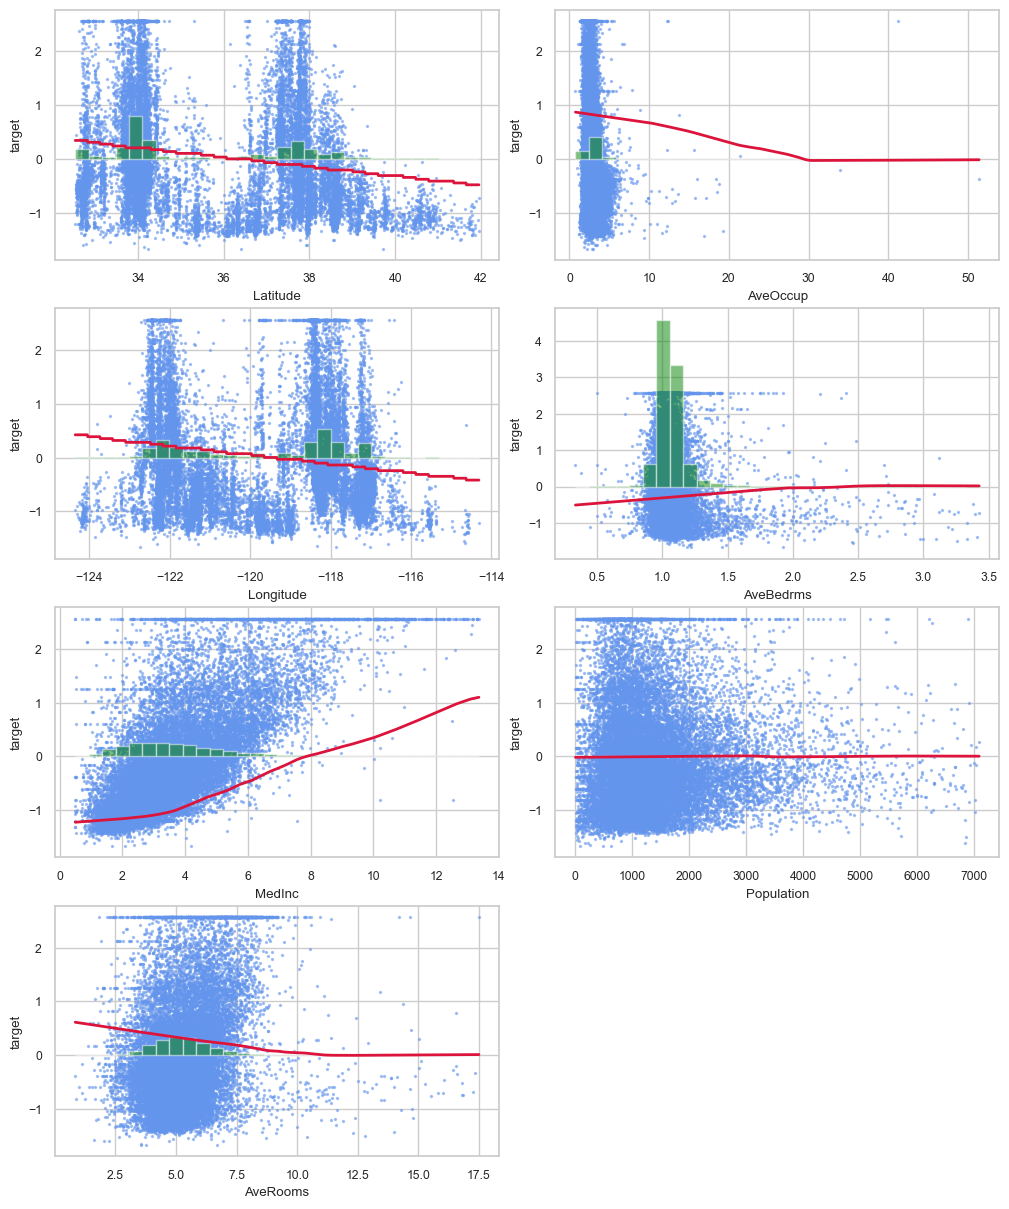

In [11]:
nam.plot()

# Test Titanic

In [2]:
dataset = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

# Read the dataset into a Pandas DataFrame
TITANIC = pd.read_csv(dataset)

In [5]:
nam = NAM(
    "survived ~  -1 + MLP(fare) + MLP(n_siblings_spouses) + MLP(age) + MLP(parch) + MLP(sex) + MLP(deck) + MLP(embark_town) + MLP(alone)", 
    data=TITANIC, 
    feature_dropout=0.0001, 
    output_activation="linear")

In [6]:
nam.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics="accuracy")

# Train the model
nam.fit(nam.training_dataset, epochs=50, validation_data=nam.validation_dataset)

# Evaluate the model
loss = nam.evaluate(nam.validation_dataset)
print("Test Loss:", loss)

Epoch 1/50


1/1 [==============================] - 4s 4s/step - loss: 5.4641 - accuracy: 0.6096 - val_loss: 2.2524 - val_accuracy: 0.5760
Epoch 2/50
1/1 [==============================] - 0s 38ms/step - loss: 2.7727 - accuracy: 0.6155 - val_loss: 0.6549 - val_accuracy: 0.6320
Epoch 3/50
1/1 [==============================] - 0s 30ms/step - loss: 0.9239 - accuracy: 0.6275 - val_loss: 0.6434 - val_accuracy: 0.5360
Epoch 4/50
1/1 [==============================] - 0s 42ms/step - loss: 0.7921 - accuracy: 0.5717 - val_loss: 0.7638 - val_accuracy: 0.4400
Epoch 5/50
1/1 [==============================] - 0s 39ms/step - loss: 0.9155 - accuracy: 0.5139 - val_loss: 0.7629 - val_accuracy: 0.4400
Epoch 6/50
1/1 [==============================] - 0s 40ms/step - loss: 1.0383 - accuracy: 0.4841 - val_loss: 0.7262 - val_accuracy: 0.4240
Epoch 7/50
1/1 [==============================] - 0s 33ms/step - loss: 0.8365 - accuracy: 0.5438 - val_loss: 0.6222 - val_accuracy: 0.7040
Epoch 8/50
1/1 [========================

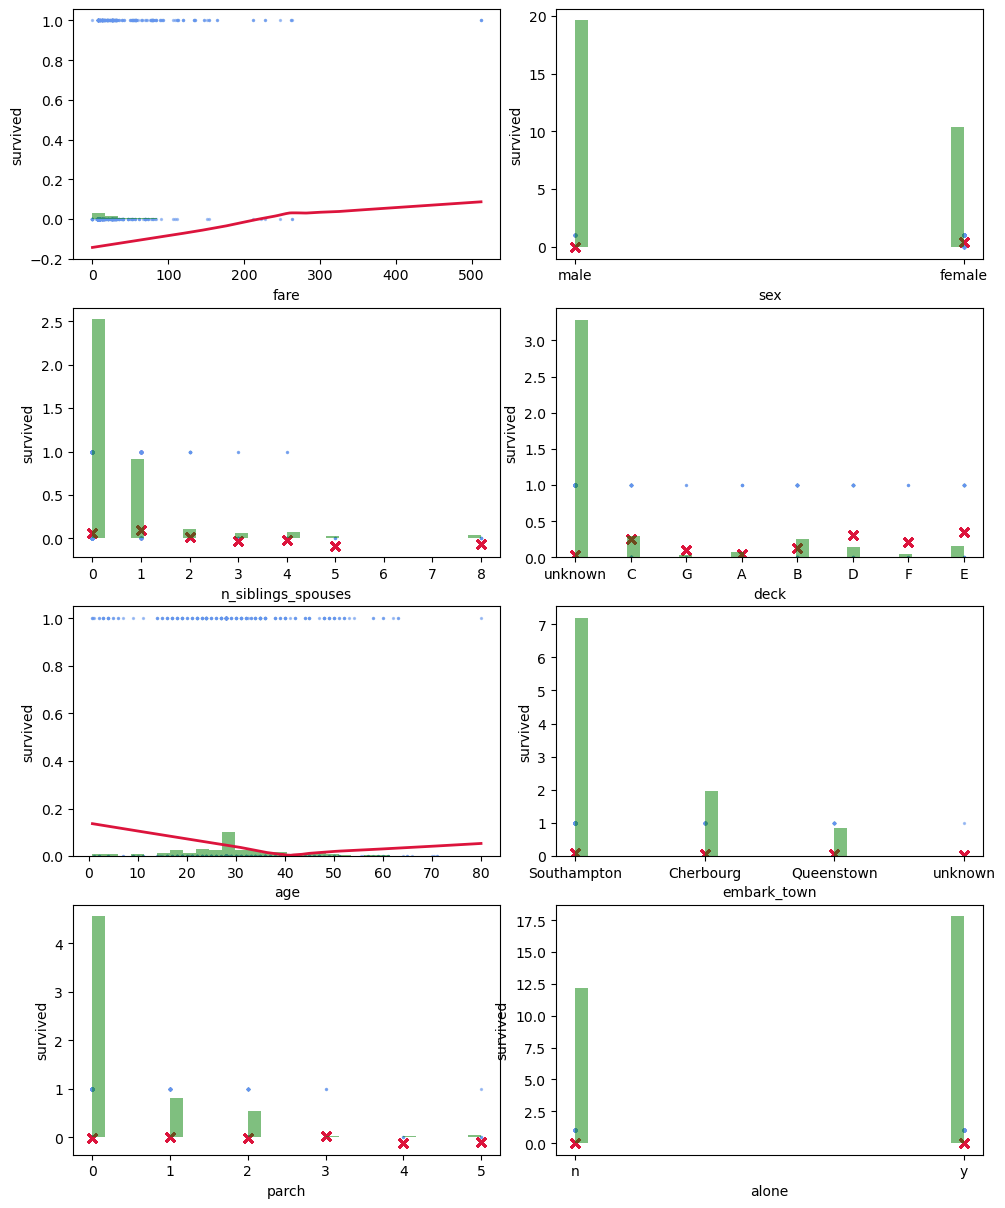

In [7]:
nam.plot()

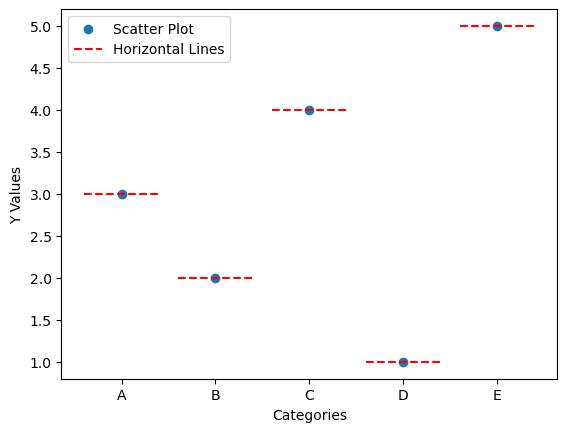

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Sample categorical data and corresponding y-values
categories = ['A', 'B', 'C', 'D', 'E']
y_values = [3, 2, 4, 1, 5]

# Create a scatterplot
plt.scatter(categories, y_values, label='Scatter Plot')

# Add horizontal lines at the y positions
y_positions = y_values  # Use the y_values directly
x_positions = np.arange(len(categories))  # Numerical x-positions
plt.hlines(y_positions, xmin=x_positions - 0.4, xmax=x_positions + 0.4, colors='r', linestyle='dashed', label='Horizontal Lines')

# Label the axes and add a legend
plt.xlabel('Categories')
plt.ylabel('Y Values')
plt.legend()

# Show the plot
plt.show()


In [9]:
nam.feature_information

{'fare': {'Network': 'MLP',
  'sizes': ListWrapper([128, 64, 32]),
  'dropout': 0.5,
  'activation': 'relu',
  'dtype': dtype('float64'),
  'encoding': 'normalized'},
 'n_siblings_spouses': {'Network': 'MLP',
  'sizes': ListWrapper([128, 64, 32]),
  'dropout': 0.5,
  'activation': 'relu',
  'dtype': dtype('int64'),
  'encoding': 'one_hot'},
 'age': {'Network': 'MLP',
  'sizes': ListWrapper([128, 64, 32]),
  'dropout': 0.5,
  'activation': 'relu',
  'dtype': dtype('float64'),
  'encoding': 'normalized'},
 'parch': {'Network': 'MLP',
  'sizes': ListWrapper([128, 64, 32]),
  'dropout': 0.5,
  'activation': 'relu',
  'dtype': dtype('int64'),
  'encoding': 'one_hot'},
 'sex': {'Network': 'MLP',
  'sizes': ListWrapper([128, 64, 32]),
  'dropout': 0.5,
  'activation': 'relu',
  'dtype': dtype('O'),
  'encoding': 'one_hot'},
 'deck': {'Network': 'MLP',
  'sizes': ListWrapper([128, 64, 32]),
  'dropout': 0.5,
  'activation': 'relu',
  'dtype': dtype('O'),
  'encoding': 'one_hot'},
 'embark_town

In [10]:
nam.CAT_FEATURES

ListWrapper(['n_siblings_spouses', 'parch', 'sex', 'deck', 'embark_town', 'alone'])

In [11]:
from keras.utils import to_categorical
to_categorical(TITANIC["n_siblings_spouses"])

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)